# Analysis


## Imports


In [1]:
import os
import matplotlib.pyplot as plt

## Stretch Analysis


In [2]:
# Define the test case path
test_case_path = "../tests/test4"

# Read parameters.txt
parameters_file = os.path.join(test_case_path, "inp", "parameters.txt")

parameters = {}

# Read the parameters from the file
with open(parameters_file, "r") as file:
    for i, line in enumerate(file, start=1):
        value = int(line.strip())
        if i == 1:
            parameters["n"] = value
        elif i == 2:
            parameters["k"] = value
        elif i == 3:
            parameters["num_threads"] = value
        elif i == 4:
            parameters["g"] = value
        elif i == 5:
            parameters["both"] = True if value == 1 else False
        elif i == 6:
            parameters["spaceopt"] = True if value == 1 else False
        elif i == 7:
            parameters["verbose"] = True if value == 1 else False
        elif i == 8:
            parameters["debug"] = True if value == 1 else False

In [3]:
# Define the paths for answers.txt and distance.txt
answers_file = os.path.join(test_case_path, "out", "answers.txt")
distance_file = os.path.join(test_case_path, "out", "distance.txt")

# Read the value of k from parameters
k = int(parameters["k"])

stretch = []

# Read the files line by line and check the condition
with open(answers_file, "r") as answers, open(distance_file, "r") as distances:
    i = 1
    for answer_line, distance_line in zip(answers, distances):
        try:
            answer = float(answer_line.strip())
            distance = float(distance_line.strip())
        except ValueError:
            print(f"Invalid data at line {answers.tell()}")
            continue

        if answer >= distance and answer <= (2 * k - 1) * distance:
            if distance != 0:
                stretch.append(answer / distance)
        else:
            print(
                "Stretch is wrong at line ",
                i,
                "; Answer: ",
                answer,
                " and Distance: ",
                distance,
            )

        i += 1

Stretch is wrong at line  34 ; Answer:  9.76375  and Distance:  10.3529
Stretch is wrong at line  62 ; Answer:  9.54891  and Distance:  9.85099
Stretch is wrong at line  63 ; Answer:  9.99743  and Distance:  10.2649
Stretch is wrong at line  71 ; Answer:  8.8794  and Distance:  9.14684
Stretch is wrong at line  87 ; Answer:  3.90511  and Distance:  4.00181
Stretch is wrong at line  92 ; Answer:  4.8759  and Distance:  6.14901
Stretch is wrong at line  105 ; Answer:  8.71552  and Distance:  8.91019
Stretch is wrong at line  119 ; Answer:  8.65144  and Distance:  9.3873
Stretch is wrong at line  166 ; Answer:  7.69368  and Distance:  7.88005
Stretch is wrong at line  175 ; Answer:  6.3429  and Distance:  7.48817
Stretch is wrong at line  195 ; Answer:  6.6773  and Distance:  8.28989
Stretch is wrong at line  199 ; Answer:  9.6776  and Distance:  10.432
Stretch is wrong at line  203 ; Answer:  7.39556  and Distance:  7.40367
Stretch is wrong at line  208 ; Answer:  9.2876  and Distance:  

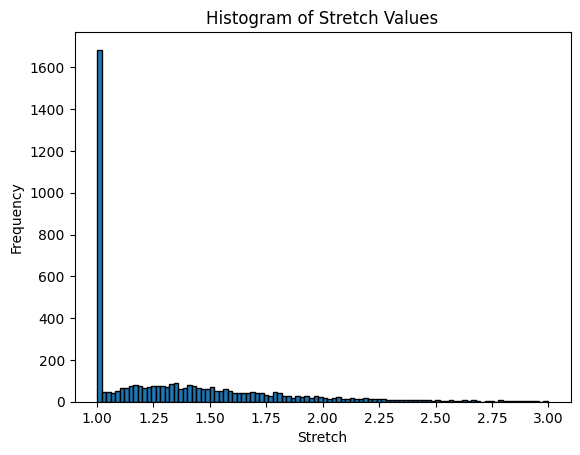

In [4]:
plt.hist(stretch, bins=100, edgecolor="black")
plt.xlabel("Stretch")
plt.ylabel("Frequency")
plt.title("Histogram of Stretch Values")
# plt.grid(True)
# plt.savefig('stretch_histogram.png')
plt.show()

## Query Time Analysis
